<a href="https://colab.research.google.com/github/SsoYeon-kim/Speech-Recognition/blob/main/_%EC%98%A4%EB%94%94%EC%98%A4_%EB%B6%84%EB%A5%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [15]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정



In [20]:
midi_file = "/gdrive/My Drive/Speech Recognition/GeneralMidi.wav"

* wav 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [21]:
instruments = [0, 10, 20, 30, 40, 50, 60,70, 80, 90]
num_notes = 50
sec = 2

#10개 악기 하나당 50개의 음을 갖는, 총 500개의 데이터를 사용

audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
  instrument = instruments[inst_idx]
  offset = (instrument*num_notes*sec) + (note*sec)
  print('instrument : {}, nore : {}, offset : {}'.format(instrument, note, offset))
  y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0)
  audio.append(y)
  inst.append(inst_idx)

instrument : 0, nore : 0, offset : 0
instrument : 0, nore : 1, offset : 2
instrument : 0, nore : 2, offset : 4
instrument : 0, nore : 3, offset : 6
instrument : 0, nore : 4, offset : 8
instrument : 0, nore : 5, offset : 10
instrument : 0, nore : 6, offset : 12
instrument : 0, nore : 7, offset : 14
instrument : 0, nore : 8, offset : 16
instrument : 0, nore : 9, offset : 18
instrument : 0, nore : 10, offset : 20
instrument : 0, nore : 11, offset : 22
instrument : 0, nore : 12, offset : 24
instrument : 0, nore : 13, offset : 26
instrument : 0, nore : 14, offset : 28
instrument : 0, nore : 15, offset : 30
instrument : 0, nore : 16, offset : 32
instrument : 0, nore : 17, offset : 34
instrument : 0, nore : 18, offset : 36
instrument : 0, nore : 19, offset : 38
instrument : 0, nore : 20, offset : 40
instrument : 0, nore : 21, offset : 42
instrument : 0, nore : 22, offset : 44
instrument : 0, nore : 23, offset : 46
instrument : 0, nore : 24, offset : 48
instrument : 0, nore : 25, offset : 50
i

In [22]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


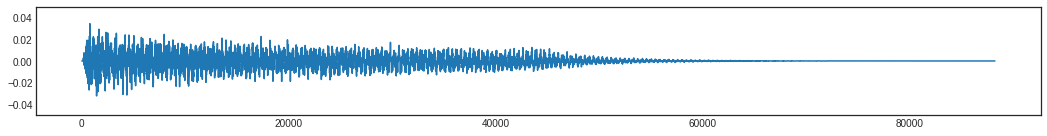

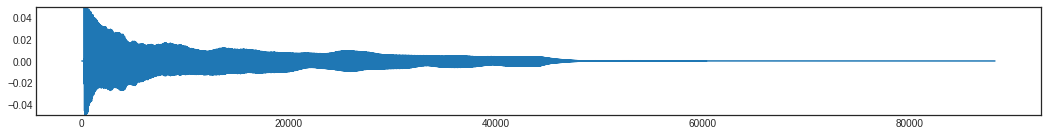

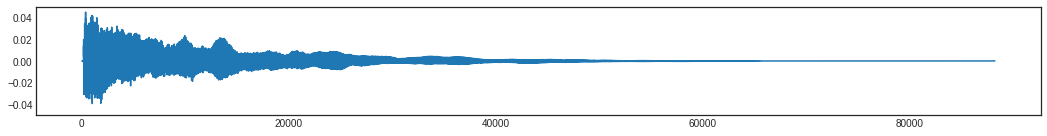

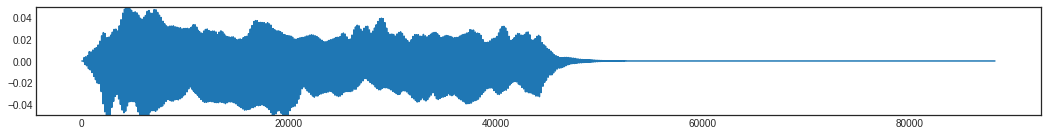

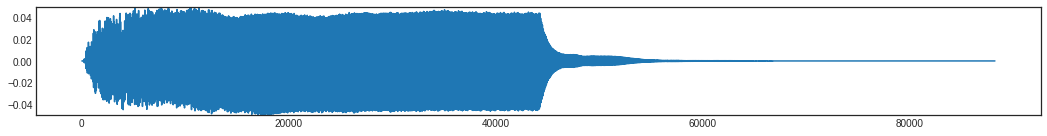

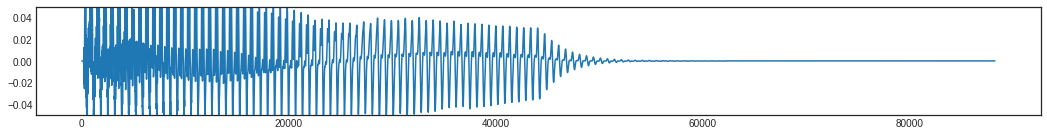

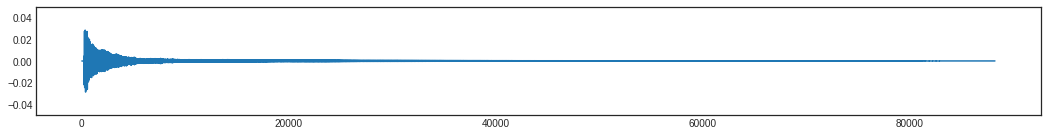

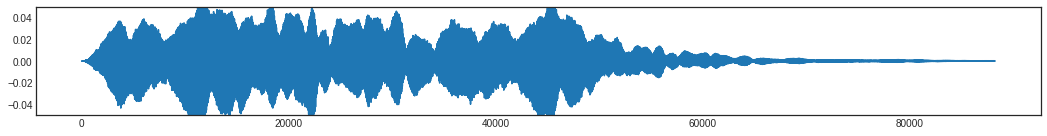

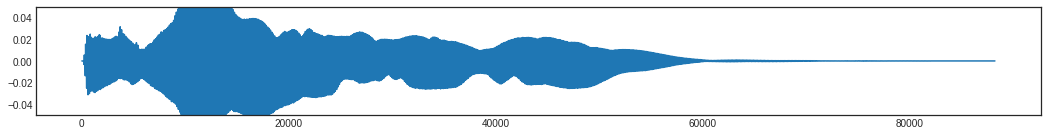

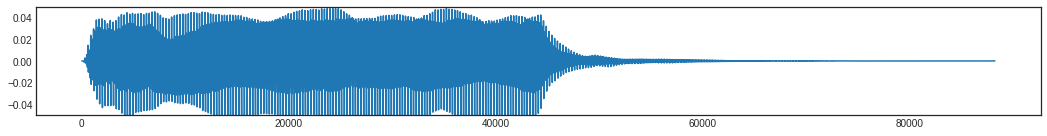

In [24]:
for idx in range(0, len(audio_np), num_notes):
  plt.figure(figsize=(18,2))
  plt.plot(audio_np[idx])
  plt.ylim((-0.05, 0.05))
  plt.show()

  #10악기 waveform 출력

In [25]:
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


In [26]:
# 두 번째 악기 (0-49가 첫 번째 악기)
print(inst_np[50])
ipd.Audio(audio_np[50], rate=sr)

1


In [27]:
# 세 번째 악기
print(inst_np[100])
ipd.Audio(audio_np[100], rate=sr)

2


In [28]:
# 네 번째 악기
print(inst_np[150])
ipd.Audio(audio_np[150], rate=sr)

3


In [29]:
# 다섯 번째 악기
print(inst_np[200])
ipd.Audio(audio_np[200], rate=sr)

4


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [33]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(400, 88200)
(400,)
(100, 88200)
(100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 성능 너무 안좋음!

0.09


### Support Vector Machine

In [36]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 성능 너무 안좋음!

0.05


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 성능 너무 안좋음!
# 데이터가 88200으로 길어서 긴 데이터를 잘 처리하지 못함

0.32


## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [38]:
audio_cqt = []
for y in audio:
  ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  audio_cqt.append(ret)

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


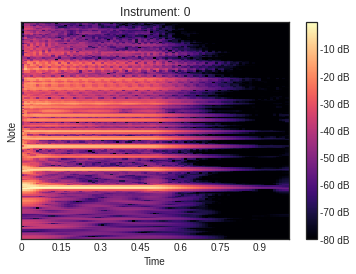

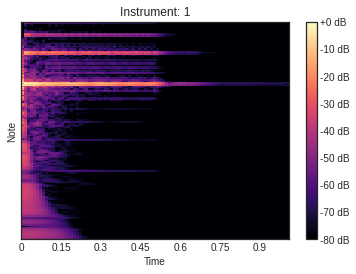

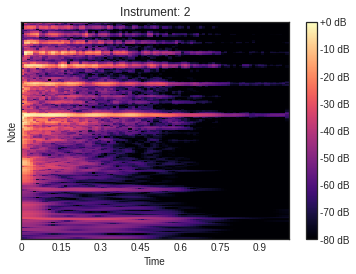

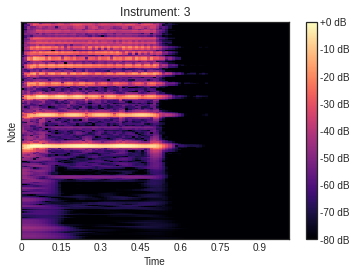

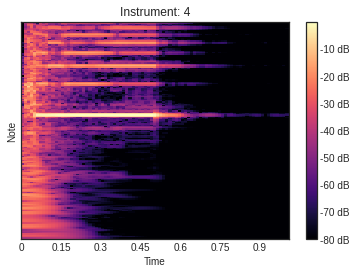

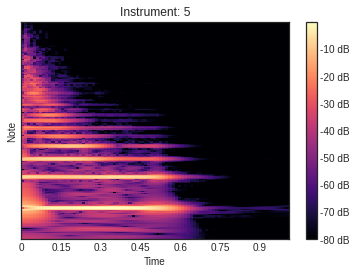

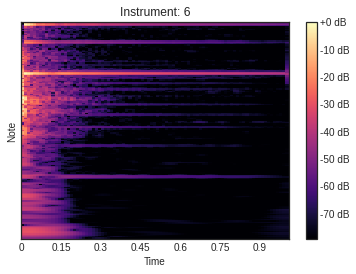

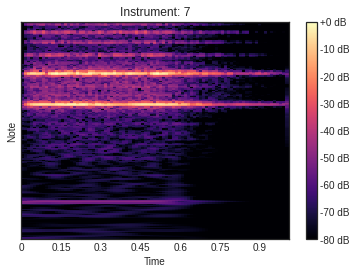

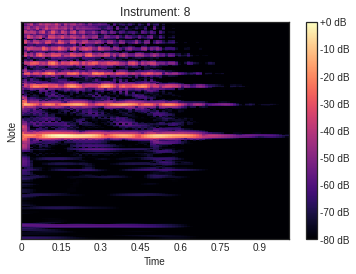

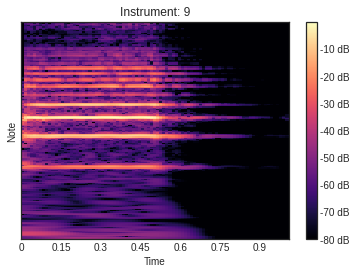

In [39]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(inst[i]))
  plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [41]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [42]:
cqt_np = cqt_np.reshape((500,168*87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [44]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# 기존 데이터는 88200인데 14616으로 줄음

(400, 14616)
(400,)
(100, 14616)
(100,)


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 아까보단 향상됨

0.27


### Support Vector Machine

In [46]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 아까보단 향상됨

0.32


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 아까보단 향상됨

0.71


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [53]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape((500, 168*87))
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [60]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(14616), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='hidden4')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [61]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 163ms/step - loss: 2.2257 - acc: 0.1219 - val_loss: 2.3223 - val_acc: 0.1750
Epoch 2/30
3/3 [==============================] - 0s 80ms/step - loss: 1.8366 - acc: 0.5031 - val_loss: 2.2609 - val_acc: 0.2375
Epoch 3/30
3/3 [==============================] - 0s 77ms/step - loss: 1.5460 - acc: 0.5594 - val_loss: 2.3288 - val_acc: 0.2125
Epoch 4/30
3/3 [==============================] - 0s 73ms/step - loss: 1.2657 - acc: 0.5875 - val_loss: 2.4260 - val_acc: 0.1875
Epoch 5/30
3/3 [==============================] - 0s 79ms/step - loss: 1.0049 - acc: 0.6875 - val_loss: 2.5862 - val_acc: 0.2125
Epoch 6/30
3/3 [==============================] - 0s 74ms/step - loss: 0.8127 - acc: 0.7563 - val_loss: 2.7837 - val_acc: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 74ms/step - loss: 0.6354 - acc: 0.8375 - val_loss: 3.0548 - val_acc: 0.1750
Epoch 8/30
3/3 [==============================] - 0s 76ms/step - loss: 0.5146 - acc: 0.8500 - va

In [80]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.grid()
  ax2.legend()

  plt.show()

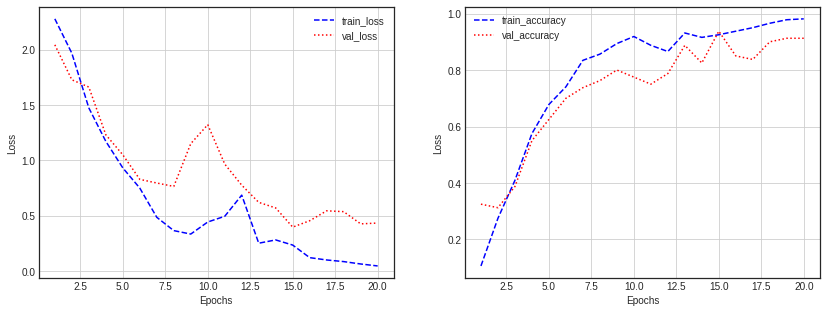

In [81]:
plot_history(history.history)

# overfitting 됨

In [82]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 6s 1s/step - loss: 0.2927 - acc: 0.9400


[0.2927257716655731, 0.9399999976158142]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [69]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)  #2차원 형태
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [76]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(168, 87, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [77]:
model = model_build()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 168, 87, 128)      1280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 84, 44, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 84, 44, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 42, 22, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 42, 22, 512)       1180

In [78]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 79s 21s/step - loss: 2.2776 - acc: 0.1063 - val_loss: 2.0431 - val_acc: 0.3250
Epoch 2/20
3/3 [==============================] - 71s 23s/step - loss: 1.9675 - acc: 0.2750 - val_loss: 1.7275 - val_acc: 0.3125
Epoch 3/20
3/3 [==============================] - 67s 21s/step - loss: 1.4737 - acc: 0.4094 - val_loss: 1.6619 - val_acc: 0.3875
Epoch 4/20
3/3 [==============================] - 65s 20s/step - loss: 1.1718 - acc: 0.5750 - val_loss: 1.2309 - val_acc: 0.5500
Epoch 5/20
3/3 [==============================] - 65s 20s/step - loss: 0.9320 - acc: 0.6781 - val_loss: 1.0503 - val_acc: 0.6250
Epoch 6/20
3/3 [==============================] - 65s 20s/step - loss: 0.7496 - acc: 0.7406 - val_loss: 0.8284 - val_acc: 0.7000
Epoch 7/20
3/3 [==============================] - 65s 20s/step - loss: 0.4859 - acc: 0.8344 - val_loss: 0.7955 - val_acc: 0.7375
Epoch 8/20
3/3 [==============================] - 65s 20s/step - loss: 0.3657 - acc: 0.8562 - val

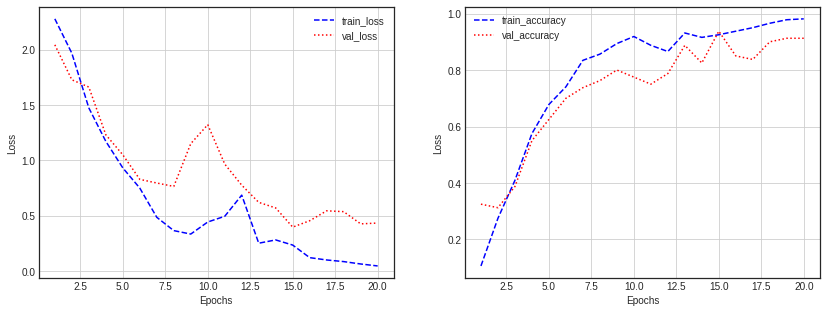

In [83]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [84]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 7s 2s/step - loss: 0.2927 - acc: 0.9400


[0.2927257716655731, 0.9399999976158142]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [85]:
audio_mfcc = []
for y in  audio:
  ret = librosa.feature.mfcc(y=y, sr=sr)
  audio_mfcc.append(ret)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0, flags=flags)


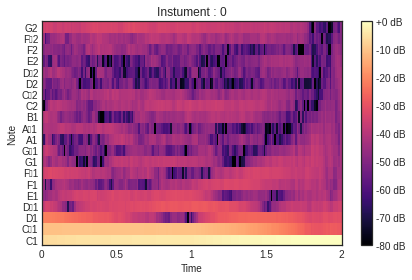

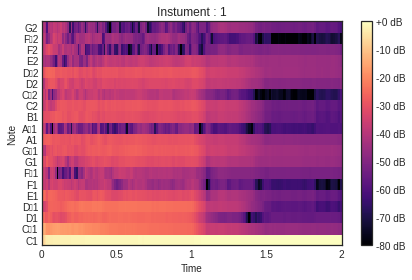

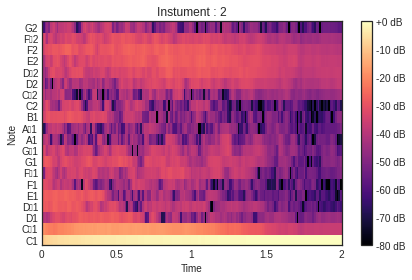

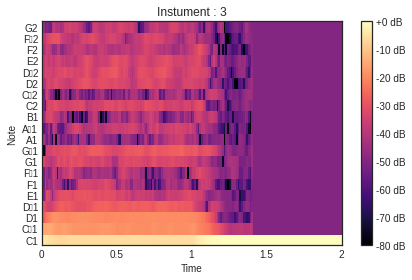

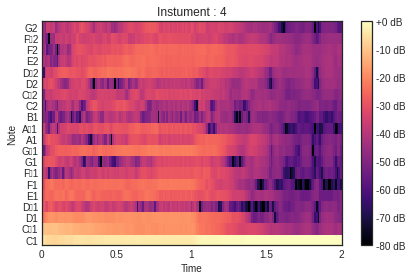

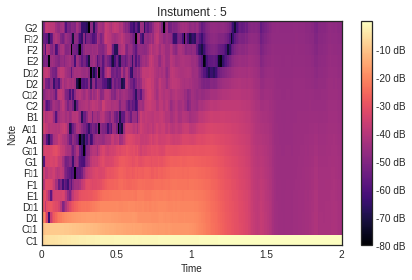

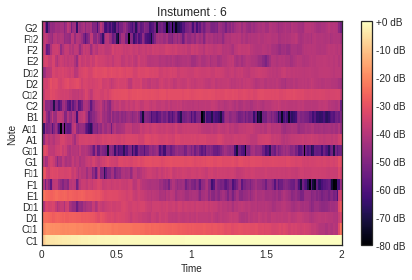

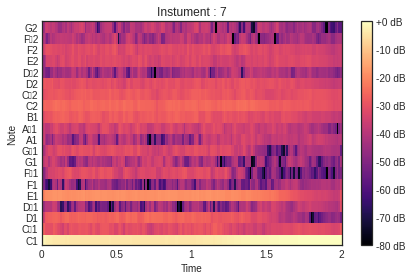

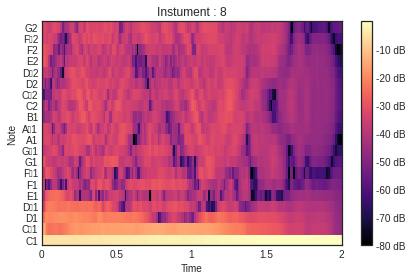

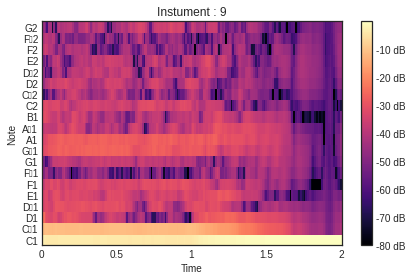

In [89]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instument : {}'.format(inst[i]))
  plt.tight_layout()
  plt.show()

In [90]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [91]:
mfcc_np = mfcc_np.reshape((500, 20*173))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [93]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# 3460으로 더 줄었음

(400, 3460)
(400,)
(100, 3460)
(100,)


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 완전 향상 (오디오 feature를 무엇을 쓰냐에 따라 성능이 달라짐)

0.97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Support Vector Machine

In [95]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.97


### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.85


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [97]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500, 20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [98]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(3460, ), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='hidden4')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [99]:
model = model_build()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3460)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               1772032   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,937,546
Trainable params: 1,937,546
Non-trainable params: 0
_________________________________________________________________


In [100]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 1s 235ms/step - loss: 206.7483 - acc: 0.1312 - val_loss: 292.9880 - val_acc: 0.1250
Epoch 2/30
3/3 [==============================] - 0s 70ms/step - loss: 290.5264 - acc: 0.1156 - val_loss: 254.0399 - val_acc: 0.1250
Epoch 3/30
3/3 [==============================] - 0s 66ms/step - loss: 206.3702 - acc: 0.1594 - val_loss: 179.6939 - val_acc: 0.1250
Epoch 4/30
3/3 [==============================] - 0s 89ms/step - loss: 138.3317 - acc: 0.1937 - val_loss: 129.2694 - val_acc: 0.1500
Epoch 5/30
3/3 [==============================] - 0s 63ms/step - loss: 94.8770 - acc: 0.2438 - val_loss: 61.7893 - val_acc: 0.2875
Epoch 6/30
3/3 [==============================] - 0s 68ms/step - loss: 54.7342 - acc: 0.2875 - val_loss: 30.6891 - val_acc: 0.4250
Epoch 7/30
3/3 [==============================] - 0s 61ms/step - loss: 30.7081 - acc: 0.4125 - val_loss: 37.4271 - val_acc: 0.3500
Epoch 8/30
3/3 [==============================] - 0s 50ms/step - loss: 25.

In [101]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.grid()
  ax2.legend()

  plt.show()

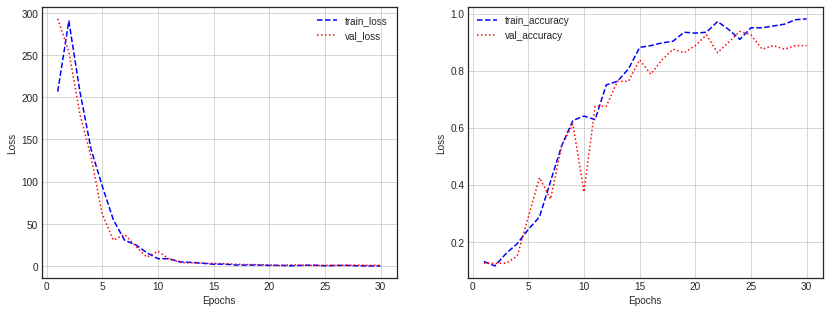

In [102]:
plot_history(history.history)

In [103]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 3.5233 - acc: 0.8300


[3.523319959640503, 0.8299999833106995]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [104]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)  #2차원 형태
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [105]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(20, 173, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [106]:
model = model_build()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20, 173, 1)]      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 173, 128)      1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 10, 87, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 87, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 44, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 44, 512)        1180

In [107]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 18s 5s/step - loss: 87.6273 - acc: 0.1219 - val_loss: 46.4734 - val_acc: 0.1500
Epoch 2/20
3/3 [==============================] - 16s 5s/step - loss: 28.3703 - acc: 0.0844 - val_loss: 3.5921 - val_acc: 0.0625
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 2.7747 - acc: 0.1063 - val_loss: 2.3335 - val_acc: 0.1375
Epoch 4/20
3/3 [==============================] - 16s 5s/step - loss: 2.2699 - acc: 0.2031 - val_loss: 2.1606 - val_acc: 0.2500
Epoch 5/20
3/3 [==============================] - 16s 5s/step - loss: 2.0606 - acc: 0.1969 - val_loss: 2.0039 - val_acc: 0.2250
Epoch 6/20
3/3 [==============================] - 17s 5s/step - loss: 1.7901 - acc: 0.3031 - val_loss: 1.8984 - val_acc: 0.2625
Epoch 7/20
3/3 [==============================] - 16s 5s/step - loss: 1.5296 - acc: 0.4812 - val_loss: 1.2940 - val_acc: 0.5750
Epoch 8/20
3/3 [==============================] - 16s 5s/step - loss: 1.0154 - acc: 0.7281 - val_loss

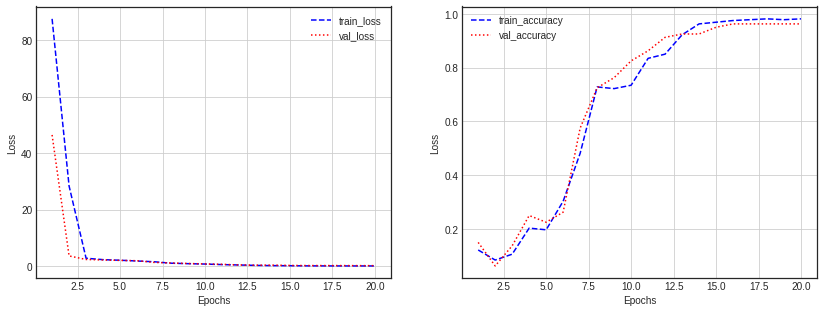

In [108]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [109]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 1s 317ms/step - loss: 0.1388 - acc: 0.9700


[0.13879913091659546, 0.9700000286102295]